In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import matplotlib.pyplot as plt
import os
from IPython.display import clear_output

In [2]:
dim = 30

In [3]:

def plotVoxels(vertices):
    fig = plt.figure(figsize=(9,9))
    ax = fig.gca(projection='3d')
    ax.voxels(vertices,edgecolor='k')
    ax.set_aspect('equal')
    plt.show()
        

In [4]:
def saveVoxels(dir_name, vox):
    with open(dir_name, 'w') as file:
        for i in range(dim):
            for j in range(dim):
                for k in range(dim):
                    file.write(str(int(vox[i][j][k])))
                    if k == dim - 1:
                        file.write("\n")
                    else:
                        file.write(',')
def loadVoxels(dir_name):
    voxels = np.zeros((dim,dim,dim))
    with open(dir_name) as file:
        for i in range(dim):
            for j in range(dim):
                line = file.readline()
                if line != "":
                    l = np.array(line.split(",")).astype(int)
                    voxels[i][j] = l
    return voxels

In [5]:
def toVoxels(filename):
    voxels = np.zeros((dim,dim,dim))
    with open(filename) as file:
        file.readline()
        line = file.readline()
        numVertices = int(line.split(' ')[0])
        numFaces = int(line.split(' ')[1])
        vertices = np.array([])
        for i in range(numVertices):
            v = np.array(file.readline().split(' ')).astype(float)
            vertices = np.append(vertices,v)
        vertices = vertices.reshape(numVertices, 3)
        
        minX = min(vertices[:,0])
        maxX = max(vertices[:,0])
        minY = min(vertices[:,1])
        maxY = max(vertices[:,1])
        minZ = min(vertices[:,2])
        maxZ = max(vertices[:,2])
        
        xOffset = 0
        if minX < 0:
            xOffset = -1*minX
        yOffset = 0
        if minY < 0:
            yOffset = -1*minY
        zOffset = 0
        if minZ < 0:
            zOffset = -1*minZ
        
        xDiv = (maxX + xOffset)/(dim - 1)
        yDiv = (maxY + yOffset)/(dim - 1)
        zDiv = (maxZ + zOffset)/(dim - 1)
        for i in range(numVertices):
            v = vertices[i]
            x = int((v[0] + xOffset)/(xDiv))
            y = int((v[1] + yOffset)/(yDiv))
            z = int((v[2] + zOffset)/(zDiv))
            vertices[i][0] = x
            vertices[i][1] = y
            vertices[i][2] = z
            voxels[x][y][z] = 1
        for i in range(numFaces):
            line = file.readline()
            points = []
            for i in range(1,4):
                val = vertices[int(line.split(' ')[i])]
                points.append(val)
            points = np.array(points).astype(int)
            fillFace(points,voxels)
            
                
    return voxels
def fillFace(points,voxels):
    a = points[0]
    b = points[1]
    c = points[2]
    if np.array_equal(a,b) or np.array_equal(a,c) or np.array_equal(b,c):
        return
    minX = min(points[:,0])
    maxX = max(points[:,0])
    minY = min(points[:,1])
    maxY = max(points[:,1])
    minZ = min(points[:,2])
    maxZ = max(points[:,2])
    for x in range(minX, maxX + 1):
        for y in range(minY, maxY + 1):
            for z in range(minZ, maxZ + 1):
                p = np.array([x,y,z])
                if np.abs(distanceToPlane(p,a,b,c)) < 0.4 and min(barycentric(p,a,b,c)) >= 0:
                    voxels[x][y][z] = 1

def distanceToPlane(p,a,b,c):
    n = np.cross((b-a), (c-a))
    n = n/ np.linalg.norm(n)
    return np.dot(n, (p - a))
def barycentric(p,a,b,c):
    v0 = b - a
    v1 = c - a
    v2 = p -a
    d00 = np.dot(v0,v0)
    d01 = np.dot(v0,v1)
    d11 = np.dot(v1,v1)
    d20 = np.dot(v2,v0)
    d21 = np.dot(v2,v1)
    denom = d00*d11-d01*d01
    v = (d11*d20 - d01*d21)/denom
    w = (d00*d21-d01*d20)/denom
    u = 1 - v - w
    return (u,w,v)

        

In [28]:


for filename in os.listdir('ModelNet10/chair/test'):
    f = filename.split(".")[0]
    vox = toVoxels(os.getcwd() + '\\ModelNet10\\chair\\test\\' + filename)
    saveVoxels(os.getcwd() + '\\ChairVoxels\\test\\' + f + ".vox", vox)
    clear_output()
    print(f)


chair_0989


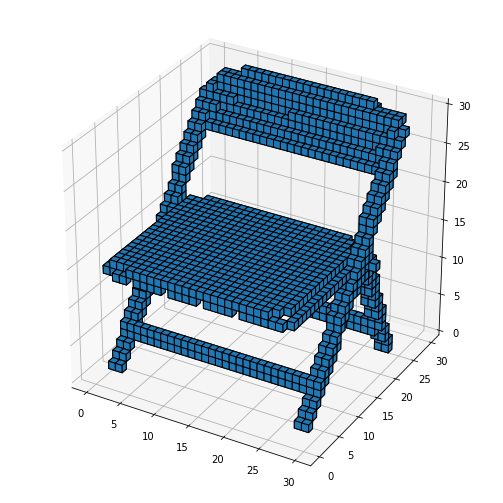

In [7]:
vox = loadVoxels(os.getcwd() + '\\ChairVoxels\\train\\chair_0001.vox')
plotVoxels(vox)